In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, f1_score

from sklearn import metrics

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive

# Monter Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Chemin dans Google Drive
drive_path = '/content/drive/MyDrive/Projet M1-Luc-fraude/Projet M1/hmeq.csv'

In [5]:
hm=pd.read_csv(drive_path)
data = hm.copy()

In [6]:
# Afficher les 5 premieres ligne de données
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
# Displaying last 5 rows
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


**Voici la signification possible de chaque entête de données dans ton tableau :**

*   LOAN : Montant du prêt demandé par l'emprunteur.
*   BAD : Indicateur binaire indiquant si le prêt est en défaut (1) ou non (0).
*   MORTDUE : Montant dû sur l'hypothèque actuelle de l'emprunteur.
*   VALUE : Valeur estimée de la propriété de l'emprunteur.
*   REASON : Raison du prêt, comme "HomeImp" (amélioration de la maison) ou "DebtCon" (consolidation de dettes).
*   JOB : Type d'emploi de l'emprunteur, comme "Other" ou "Office".
*   YOJ : Années d'ancienneté de l'emprunteur dans son emploi actuel (Years on Job).
*   DEROG : Nombre de rapports dérogatoires (comportements financiers négatifs comme des défauts de paiement) dans le dossier de crédit de l'emprunteur.
*   DELINQ : Nombre de prêts en retard dans le passé de l'emprunteur.
*   CLAGE : Âge moyen des comptes de crédit de l'emprunteur, exprimé en mois.
*   NINQ : Nombre de demandes de crédit récentes faites par l'emprunteur.
*   CLNO : Nombre total de comptes de crédit de l'emprunteur.
*   DEBTINC : Ratio de la dette sur le revenu de l'emprunteur
Ces données sont souvent utilisées dans les modèles de risque de crédit pour prédire la probabilité de défaut sur un prêt.

In [7]:
# Checking the shape of the data
data.shape

(5960, 13)

In [8]:
# Checking info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [9]:
# Analyzing missing values
(data.isnull().sum())

,0
BAD,0
LOAN,0
MORTDUE,518
VALUE,112
REASON,252
JOB,279
YOJ,515
DEROG,708
DELINQ,580
CLAGE,308


In [10]:
# Checking the percentage of missing values in the each column.
(data.isnull().sum()/data.shape[0] * 100)

,0
BAD,0.000000
LOAN,0.000000
MORTDUE,8.691275
VALUE,1.879195
REASON,4.228188
JOB,4.681208
YOJ,8.640940
DEROG,11.879195
DELINQ,9.731544
CLAGE,5.167785


In [11]:
cols = data.select_dtypes(['object']).columns.tolist()
#adding target variable to this list as this is a classification problem and the target variable is categorical

cols.append('BAD')

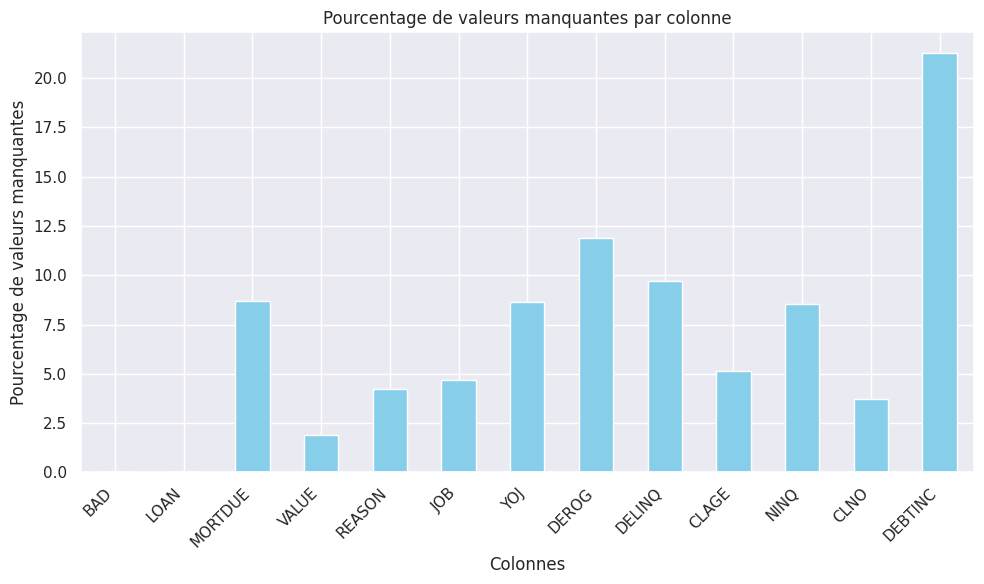

In [12]:
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Créer un histogramme
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Pourcentage de valeurs manquantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
cols

['REASON', 'JOB', 'BAD']

In [14]:
# Changing the data type of object type column to category.

for i in cols:
    data[i] = data[i].astype("category")

In [15]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [ ]:
# Analyzing the summary statistics for numerical variables

num_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


In [ ]:
# Checking summary for categorical data

data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


In [ ]:
# Checking the count of unique values in each categorical column

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize = True))
    print('*'*40)

Unique values in BAD are :
BAD
0    0.800503
1    0.199497
Name: proportion, dtype: float64
****************************************
Unique values in REASON are :
REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
****************************************
Unique values in JOB are :
JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
****************************************


In [ ]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


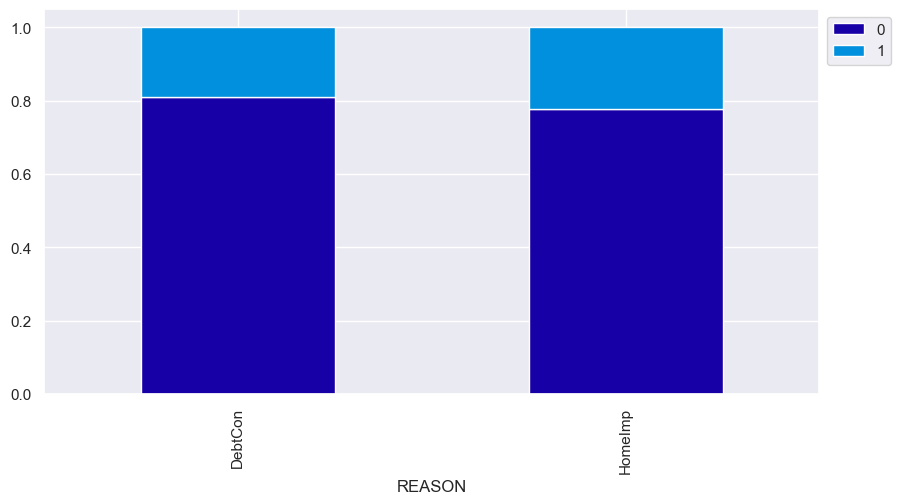

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


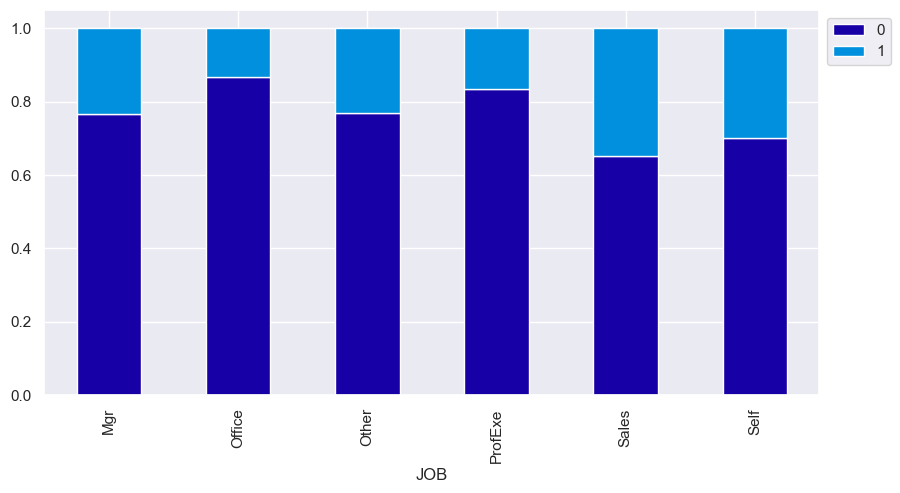

In [ ]:
# Plotting stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])
stacked_plot(data['JOB'])

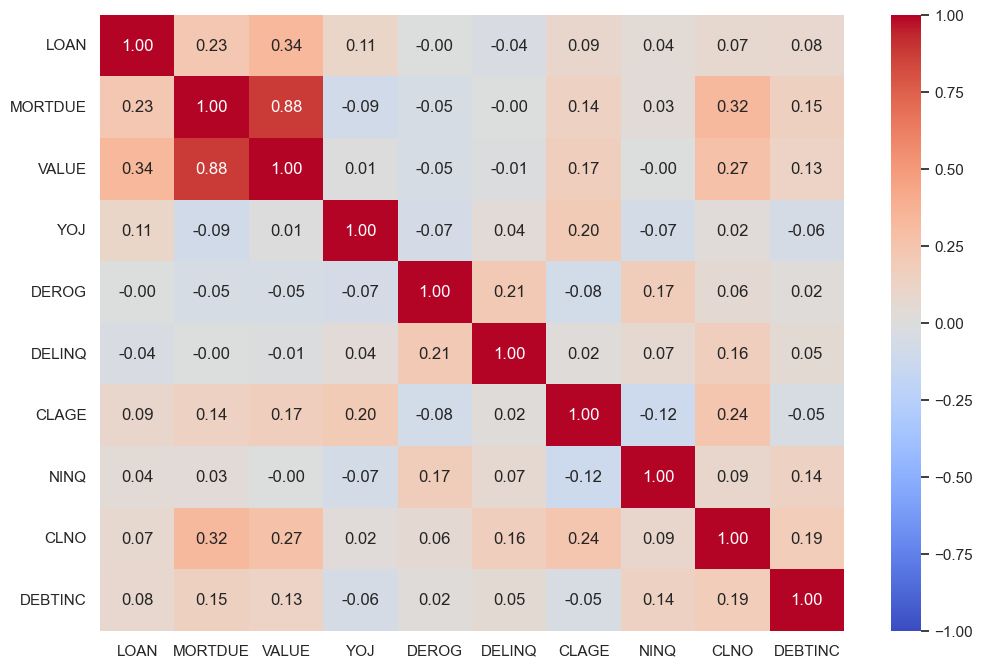

In [ ]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Building correlation matrix for numerical columns
corr = data[numerical_col].corr()

# plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [ ]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''

    Q1=df[col].quantile(q = .25) # 25th quantile
    Q3=df[col].quantile(q = .75)  # 75th quantile
    IQR = Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)

    return df

In [ ]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

In [ ]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,41600,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,41600,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,41600,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [ ]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [ ]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)

In [ ]:
# Select numeric columns.
num_data = df.select_dtypes('number')

# Selecting string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()

# Filling numeric columns with median.
df.fillna(value=num_data.median(), inplace=True)

# Filling object columns with mode.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)

In [ ]:
df.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

In [ ]:
#creating a list of bool features
bool_cols = df.select_dtypes(['bool']).columns.tolist()

#droping missing value flags
X = df.drop(columns = bool_cols)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5960 non-null   float64 
 3   VALUE    5960 non-null   float64 
 4   REASON   5960 non-null   category
 5   JOB      5960 non-null   category
 6   YOJ      5960 non-null   float64 
 7   DEROG    5960 non-null   float64 
 8   DELINQ   5960 non-null   float64 
 9   CLAGE    5960 non-null   float64 
 10  NINQ     5960 non-null   float64 
 11  CLNO     5960 non-null   float64 
 12  DEBTINC  5960 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [ ]:
# Separation variable
Y = X.BAD
X = X.drop(columns = ['BAD'])


# Création des variables factices pour les variables catégorielles
# Création de la liste des colonnes pour lesquelles nous devons créer les variables factices
to_get_dummies_for = ['REASON', 'JOB']



X = pd.get_dummies(data = X, columns = to_get_dummies_for, drop_first = True)

In [ ]:
# Mise à l'échelle des données


sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [ ]:
# Utilisez SelectKBest pour sélectionner les k meilleures caractéristiques en utilisant le test F

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
import statsmodels.api as sm

selector = SelectKBest(score_func=f_classif, k=7) # Choisissez le nombre de caractéristiques à sélectionner
X_new = selector.fit_transform(X, Y)
selected_features = X.columns[selector.get_support(indices=True)]
print("Caractéristiques sélectionnées via l'analyse univariée:")
print(selected_features)

Caractéristiques sélectionnées via l'analyse univariée:
Index(['LOAN', 'MORTDUE', 'VALUE', 'CLAGE', 'NINQ', 'DEBTINC', 'JOB_Office'], dtype='object')


In [ ]:
import statsmodels.api as sm

X = X_new
X = X.astype(int)

In [ ]:
X = pd.DataFrame(X_new, columns=selected_features)

In [ ]:
X

,LOAN,MORTDUE,VALUE,CLAGE,NINQ,DEBTINC,JOB_Office
0,1100.0,25860.0,39025.0,94.366667,1.0,34.818262,0.0
1,1300.0,70053.0,68400.0,121.833333,0.0,34.818262,0.0
2,1500.0,13500.0,16700.0,149.466667,1.0,34.818262,0.0
3,1500.0,65019.0,89235.5,173.466667,1.0,34.818262,0.0
4,1700.0,97800.0,112000.0,93.333333,0.0,34.818262,1.0
...,...,...,...,...,...,...,...
5955,41600.0,57264.0,90185.0,221.808718,0.0,36.112347,0.0
5956,41600.0,54576.0,92937.0,208.692070,0.0,35.859971,0.0
5957,41600.0,54045.0,92924.0,212.279697,0.0,35.556590,0.0
5958,41600.0,50370.0,91861.0,213.892709,0.0,34.340882,0.0


In [ ]:
# Convertissez les données pandas en un tableau numpy
X_np = np.asarray(X)
y_np = np.asarray(Y)

# Ajoutez une constante aux variables indépendantes
X_np = sm.add_constant(X_np)

# Ajustez le modèle de régression logistique
model = sm.Logit(y_np, X_np)

# Calculez les résultats
result = model.fit()

# Affichez un résumé des résultats
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.455282
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5960
Model:                          Logit   Df Residuals:                     5952
Method:                           MLE   Df Model:                            7
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                 0.08890
Time:                        09:09:16   Log-Likelihood:                -2713.5
converged:                       True   LL-Null:                       -2978.2
Covariance Type:            nonrobust   LLR p-value:                3.621e-110
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3296      0.233    -10.008      0.000      -2.786      -1.873
x1         -2.449e-05   4.17e

In [ ]:
from statsmodels.stats import diagnostic
# Ajustez le modèle de régression logistique
model = sm.Logit(Y, X)
result = model.fit()

# Calculez le R² de McFadden
McFadden_R2 = 1 - (result.llf / result.llnull)
print("R² de McFadden:", McFadden_R2)

Optimization terminated successfully.
         Current function value: 0.464279
         Iterations 6
R² de McFadden: 0.07089256193210813


In [ ]:
import numpy as np
from scipy.stats import norm

# Obtenez les coefficients et les erreurs standard à partir du modèle
params = result.params
std_err = result.bse

# Initialiser une liste pour stocker les p-valeurs pour chaque colonne
p_values = []

# Calculer les p-valeurs pour chaque colonne
for i in range(len(X.columns)):
    # Extraire le coefficient et l'erreur standard pour cette colonne
    coef = params[i]
    err = std_err[i]

    # Calculer la statistique de test z et la p-valeur associée
    z_value = coef / err
    p_value = (1 - norm.cdf(np.abs(z_value))) * 2

    # Ajouter la p-valeur à la liste
    p_values.append(p_value)

# Afficher les p-valeurs pour chaque colonne
for i, col in enumerate(X.columns):
    print(f"P-valeur pour {col}: {p_values[i]}")

P-valeur pour LOAN: 1.6897594434794883e-13
P-valeur pour MORTDUE: 0.0019628804100624286
P-valeur pour VALUE: 0.9398658779059943
P-valeur pour CLAGE: 0.0
P-valeur pour NINQ: 0.0
P-valeur pour DEBTINC: 5.376625576092309e-06
P-valeur pour JOB_Office: 2.244908259285694e-09


In [ ]:
# Separation data avec test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [ ]:
#Création de la fonction de métrique
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# definition lg
lg = LogisticRegression(solver = 'newton-cg')

# Ajustement du modèle sur les données d'entraînement

lg.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
# Coefficients de régression
coefficients = lg.coef_[0]
intercept = lg.intercept_[0]

print("Coefficients de régression :", coefficients)

Coefficients de régression : [-2.47607079e-05 -6.61688478e-06  2.40992598e-06 -5.23280033e-03
  2.09857988e-01  6.80072684e-02 -3.94260951e-01]


              precision    recall  f1-score   support

           0       0.81      0.99      0.89      3340
           1       0.65      0.06      0.12       832

    accuracy                           0.81      4172
   macro avg       0.73      0.53      0.50      4172
weighted avg       0.78      0.81      0.74      4172



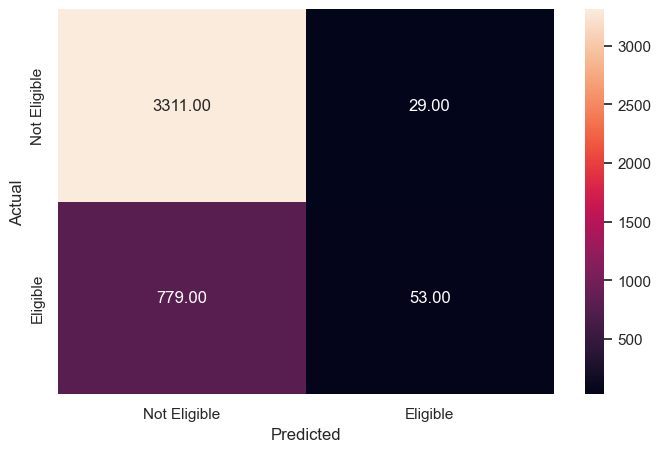

In [ ]:
#Prédiction pour l'ensemble d'entraînement
y_pred_train = lg.predict(x_train)

# Évaluation des performances sur l'ensemble d'entraînement

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1431
           1       0.65      0.06      0.10       357

    accuracy                           0.81      1788
   macro avg       0.73      0.52      0.50      1788
weighted avg       0.78      0.81      0.73      1788



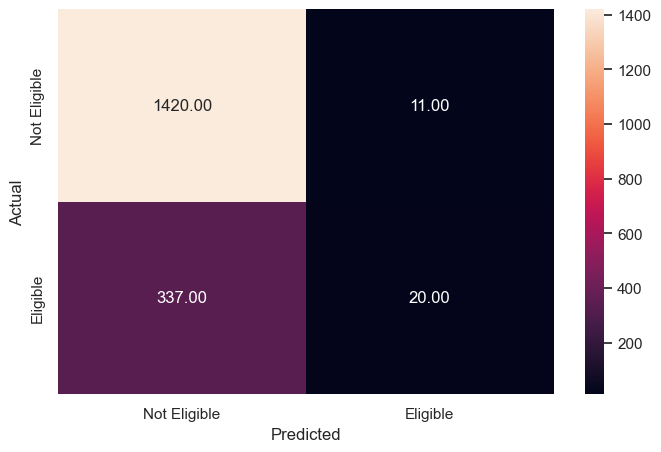

In [ ]:
y_pred_test = lg.predict(x_test)

#Test de performance avec le dataset
metrics_score(y_test, y_pred_test)

In [ ]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# Vérifions les coefficients et voyons quelles variables sont importantes et comment elles affectent le processus d'approbation de prêt.

cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
NINQ,0.209858
DEBTINC,0.068007
VALUE,0.000002
MORTDUE,-0.000007
LOAN,-0.000025
CLAGE,-0.005233
JOB_Office,-0.394261


In [ ]:
odds = np.exp(lg.coef_[0]) # Calcul des cotes

# Ajout des cotes à un DataFrame et tri des valeurs
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

,odds
NINQ,1.233503
DEBTINC,1.070373
VALUE,1.000002
MORTDUE,0.999993
LOAN,0.999975
CLAGE,0.994781
JOB_Office,0.674178


In [ ]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_pred_test)*100

print('Test Accuracy : ' , test_accuracy)

Test Accuracy :  80.53691275167785


In [ ]:
y_test_predict_probs = lg.predict_proba(x_test)[:,1]

In [ ]:
y_test_predict_probs

array([0.28456184, 0.07272117, 0.06170383, ..., 0.27499659, 0.20324455,
       0.14280057])

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_probs)

In [ ]:
from numpy import argmax

best = tpr - fpr

ix = argmax(best)

best_threshold = thresholds[ix]

print('Meilleur Seuil' ,  best_threshold)

Meilleur Seuil 0.17582419698680596


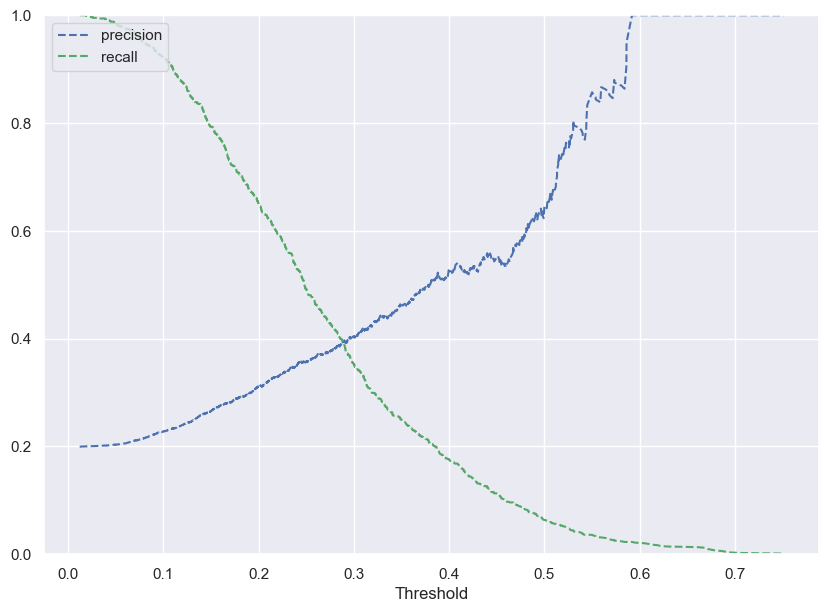

In [ ]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba donne la probabilité de chaque observation appartenant à chaque classe


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3340
           1       0.37      0.44      0.40       832

    accuracy                           0.74      4172
   macro avg       0.61      0.63      0.62      4172
weighted avg       0.76      0.74      0.75      4172



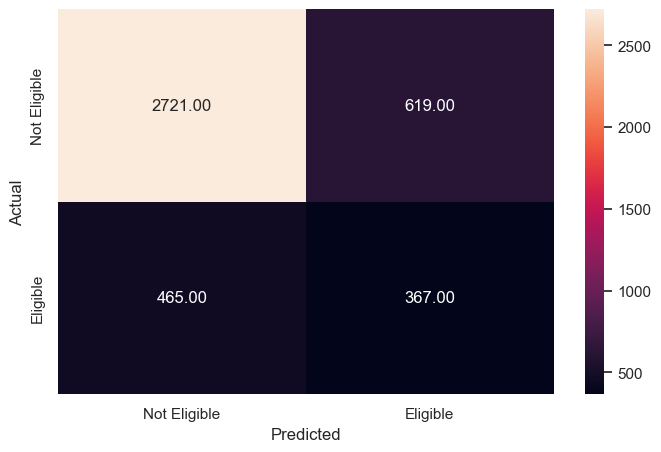

In [ ]:
optimal_threshold1 = .27

y_pred_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1431
           1       0.39      0.44      0.42       357

    accuracy                           0.75      1788
   macro avg       0.62      0.64      0.63      1788
weighted avg       0.76      0.75      0.76      1788



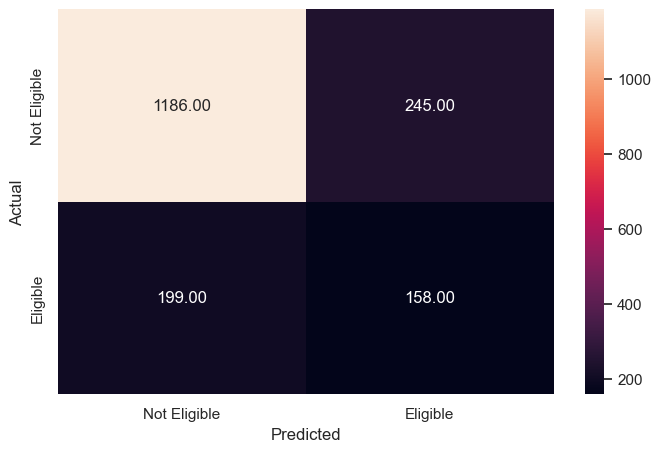

In [ ]:
optimal_threshold1 = .27

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

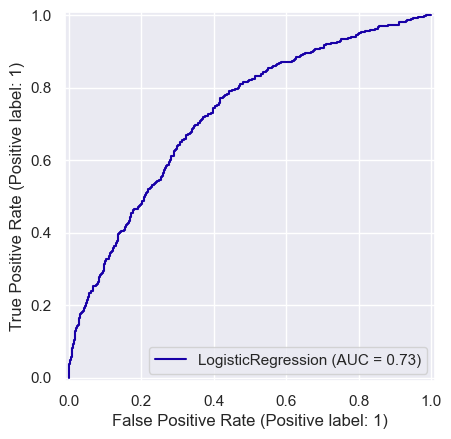

In [ ]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(lg, x_test, y_test)

In [ ]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,...,False,False,False,False,False,False,False,False,False,False
5956,0,41600,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,...,False,False,False,False,False,False,False,False,False,False
5957,0,41600,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,...,False,False,False,False,False,False,False,False,False,False
5958,0,41600,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['BAD'] = df['BAD'].replace({"vrai": 1 , "faux":0 })

In [ ]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,...,False,False,False,False,False,False,False,False,False,False
5956,0,41600,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,...,False,False,False,False,False,False,False,False,False,False
5957,0,41600,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,...,False,False,False,False,False,False,False,False,False,False
5958,0,41600,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Afficher les valeurs distinctes de la colonne 'REASON'
valeurs_distinctes_reason = df['REASON'].unique()
print("Valeurs distinctes de la colonne 'REASON':")
print(valeurs_distinctes_reason)

# Afficher les valeurs distinctes de la colonne 'JOB'
valeurs_distinctes_job = df['JOB'].unique()
print("\nValeurs distinctes de la colonne 'JOB':")
print(valeurs_distinctes_job)

Valeurs distinctes de la colonne 'REASON':
['HomeImp', 'DebtCon']
Categories (2, object): ['DebtCon', 'HomeImp']

Valeurs distinctes de la colonne 'JOB':
['Other', 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']


In [ ]:
# Convertir les variables catégorielles en valeurs numériques de 1, 2, 3, etc.
df['REASON_encoded'] = df['REASON'].cat.codes + 1
df['JOB_encoded'] = df['JOB'].cat.codes + 1

In [ ]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_encoded,JOB_encoded
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,True,2,3
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,True,2,3
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,True,2,3
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,1,3
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,True,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,...,False,False,False,False,False,False,False,False,1,3
5956,0,41600,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,...,False,False,False,False,False,False,False,False,1,3
5957,0,41600,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,...,False,False,False,False,False,False,False,False,1,3
5958,0,41600,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,...,False,False,False,False,False,False,False,False,1,3


In [ ]:
from scipy.stats import pearsonr
# Sélectionner les variables continues et la variable cible
variables_continues = ['LOAN', 'MORTDUE', 'VALUE','YOJ','DEROG','DELINQ','CLAGE','BAD'] # Remplacez les noms de colonnes par les variables continues dans votre ensemble de données
variable_cible = 'BAD'  # Remplacez 'variable_cible' par le nom de votre variable cible

# Calculer la corrélation de Pearson pour chaque paire de variables continues et la variable cible
correlations = {}
for variable in variables_continues:
    correlation, _ = pearsonr(df[variable], df[variable_cible])
    correlations[variable] = correlation


# Afficher les coefficients de corrélation
for variable, correlation in correlations.items():
    print(f"Corrélation de Pearson entre {variable} et {variable_cible}: {correlation}")

Corrélation de Pearson entre LOAN et BAD: -0.08502693424025679
Corrélation de Pearson entre MORTDUE et BAD: -0.05973583070634005
Corrélation de Pearson entre VALUE et BAD: -0.07112411230015127
Corrélation de Pearson entre YOJ et BAD: -0.0561500315363135
Corrélation de Pearson entre DEROG et BAD: nan
Corrélation de Pearson entre DELINQ et BAD: nan
Corrélation de Pearson entre CLAGE et BAD: -0.17818953349415506
Corrélation de Pearson entre BAD et BAD: 1.0


In [ ]:
from scipy.stats import chi2_contingency

# Sélectionner les variables catégorielles et la variable cible
variables_catégorielles = ['REASON_encoded', 'JOB_encoded', 'BAD']  # Remplacez les noms de colonnes par les variables catégorielles dans votre ensemble de données
variable_cible = 'BAD'  # Remplacez 'variable_cible' par le nom de votre variable cible

# Calculer le test V de Cramer pour chaque paire de variables catégorielles et la variable cible
associations = {}
for variable in variables_catégorielles:
    contingency_table = pd.crosstab(df[variable], df[variable_cible])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    associations[variable] = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Afficher les mesures d'association (test V de Cramer)
for variable, association in associations.items():
    print(f"Association entre {variable} et {variable_cible}: {association}")

Association entre REASON_encoded et BAD: 0.037058732135371496
Association entre JOB_encoded et BAD: 0.1112882864315084
Association entre BAD et BAD: 0.999474678721086


In [ ]:
# Obtenir les coefficients du modèle (importance relative des variables)
coefficients = lg.coef_[0]

# Normaliser les coefficients pour obtenir des poids
weights = coefficients / sum(abs(coefficients))

# Afficher les poids attribués aux variables
for i, variable in enumerate(X.columns):
    print(f"Poids de {variable}: {weights[i]}")

Poids de LOAN: -3.6552954287626586e-05
Poids de MORTDUE: -9.768165267342163e-06
Poids de VALUE: 3.5576492665169385e-06
Poids de CLAGE: -0.007724912872928255
Poids de NINQ: 0.3098025102280171
Poids de DEBTINC: 0.10039561804199108
Poids de JOB_Office: -0.5820270800882421


In [ ]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_encoded,JOB_encoded
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,True,2,3
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,True,2,3
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,True,2,3
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,1,3
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,True,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,...,False,False,False,False,False,False,False,False,1,3
5956,0,41600,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,...,False,False,False,False,False,False,False,False,1,3
5957,0,41600,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,...,False,False,False,False,False,False,False,False,1,3
5958,0,41600,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,...,False,False,False,False,False,False,False,False,1,3


In [ ]:
# Convertir les colonnes de la catégorie en numérique
df['REASON_encoded'] = df['REASON_encoded'].astype(int)
df['JOB_encoded'] = df['JOB_encoded'].astype(int)


In [ ]:

# Convertir les colonnes 'REASON_encoded' et 'JOB_encoded' de la catégorie en numérique
df['REASON_encoded'] = df['REASON_encoded'].astype(int)
df['JOB_encoded'] = df['JOB_encoded'].astype(int)

# Regrouper les données par les variables 'REASON_encoded' et 'JOB_encoded' et calculer la somme de chaque variable continue pour chaque groupe
grouped_data = df.groupby(['JOB_encoded']).agg({'LOAN': 'sum', 'MORTDUE': 'sum', 'VALUE': 'sum', 'CLAGE': 'mean', 'NINQ': 'mean', 'DEBTINC': 'mean', 'REASON_encoded' : 'mean'})

In [ ]:
grouped_data

,LOAN,MORTDUE,VALUE,CLAGE,NINQ,DEBTINC,REASON_encoded
JOB_encoded,,,,,,,
1,14623800,6.078632e+07,8.202693e+07,174.457344,1.303781,35.172893,1.226858
2,16662500,6.309240e+07,8.888695e+07,179.425678,0.910338,34.398816,1.317511
3,45961400,1.598328e+08,2.214971e+08,171.449441,1.145482,33.826881,1.289839
4,23905100,1.136321e+08,1.562843e+08,193.544505,0.964734,32.847257,1.317398
5,1625600,8.641356e+06,1.131455e+07,195.168323,0.678899,35.352381,1.110092
6,4810900,1.715758e+07,2.623508e+07,174.514058,1.274611,34.268122,1.595855


In [ ]:
# Vérifier les dimensions de X_grouped, y et weights
print("Dimensions de X_grouped :", grouped_data.shape)
print("Dimensions de y :", y_test.shape)
print("Dimensions de weights :", len(weights))

# Corriger les dimensions si nécessaire
# Assurez-vous que le nombre d'échantillons dans X_grouped, y et weights est le même

# Exemple de correction si les dimensions ne correspondent pas
if grouped_data.shape[0] != len(y_test) or grouped_data.shape[0] != len(weights):
    print("Les dimensions ne correspondent pas. Correction en cours...")

    # Corriger X_grouped pour qu'il ait le même nombre d'échantillons que y et weights
    # Vous devrez implémenter la logique de correction en fonction de votre ensemble de données

    # Exemple hypothétique de correction :
    # X_grouped = X_grouped[:len(y)]  # Supprimer les échantillons en excès dans X_grouped

    print("Dimensions de X_grouped après correction :", grouped_data.shape)

Dimensions de X_grouped : (6, 7)
Dimensions de y : (1788,)
Dimensions de weights : 7
Les dimensions ne correspondent pas. Correction en cours...
Dimensions de X_grouped après correction : (6, 7)


In [ ]:
grouped_data

,LOAN,MORTDUE,VALUE,CLAGE,NINQ,DEBTINC,REASON_encoded
JOB_encoded,,,,,,,
1,14623800,6.078632e+07,8.202693e+07,174.457344,1.303781,35.172893,1.226858
2,16662500,6.309240e+07,8.888695e+07,179.425678,0.910338,34.398816,1.317511
3,45961400,1.598328e+08,2.214971e+08,171.449441,1.145482,33.826881,1.289839
4,23905100,1.136321e+08,1.562843e+08,193.544505,0.964734,32.847257,1.317398
5,1625600,8.641356e+06,1.131455e+07,195.168323,0.678899,35.352381,1.110092
6,4810900,1.715758e+07,2.623508e+07,174.514058,1.274611,34.268122,1.595855


In [ ]:
grouped_data = grouped_data[:len(y_test)]

In [ ]:
# Vérifier à nouveau les dimensions de X_grouped et y
print("Dimensions de X_grouped :", grouped_data.shape)
print("Dimensions de y :", y_test.shape)

# Vérifier si les index des échantillons correspondent entre X_grouped et y
print("Index des échantillons dans X_grouped :", grouped_data.index)
print("Index des échantillons dans y :", y_test.index)

# Si les index ne correspondent pas, essayez de les réaligner ou de les fusionner correctement

Dimensions de X_grouped : (6, 7)
Dimensions de y : (1788,)
Index des échantillons dans X_grouped : Index([1, 2, 3, 4, 5, 6], dtype='int32', name='JOB_encoded')
Index des échantillons dans y : Index([4394, 5000, 2786, 2256,  114, 3787, 1289, 1189, 4715,   70,
       ...
       2252, 5843,  715, 1786, 3530, 4506, 4768, 4162, 1331, 4924],
      dtype='int64', length=1788)


In [ ]:
grouped_data

,LOAN,MORTDUE,VALUE,CLAGE,NINQ,DEBTINC,REASON_encoded
JOB_encoded,,,,,,,
1,14623800,6.078632e+07,8.202693e+07,174.457344,1.303781,35.172893,1.226858
2,16662500,6.309240e+07,8.888695e+07,179.425678,0.910338,34.398816,1.317511
3,45961400,1.598328e+08,2.214971e+08,171.449441,1.145482,33.826881,1.289839
4,23905100,1.136321e+08,1.562843e+08,193.544505,0.964734,32.847257,1.317398
5,1625600,8.641356e+06,1.131455e+07,195.168323,0.678899,35.352381,1.110092
6,4810900,1.715758e+07,2.623508e+07,174.514058,1.274611,34.268122,1.595855


In [ ]:
# Vérifier les dimensions de X_grouped et y  Index(['LOAN', 'MORTDUE', 'VALUE', 'CLAGE', 'NINQ', 'DEBTINC', 'JOB_Office'], dtype='object')
print("Dimensions de X_grouped :", grouped_data.shape)
print("Dimensions de y :", y_test.shape)

Dimensions de X_grouped : (6, 7)
Dimensions de y : (1788,)


In [ ]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_encoded,JOB_encoded
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,True,2,3
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,True,2,3
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,True,2,3
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,1,3
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,True,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,...,False,False,False,False,False,False,False,False,1,3
5956,0,41600,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,...,False,False,False,False,False,False,False,False,1,3
5957,0,41600,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,...,False,False,False,False,False,False,False,False,1,3
5958,0,41600,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,...,False,False,False,False,False,False,False,False,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

In [ ]:

# Discrétiser les variables continues
data_discretized = df.copy()  # Pour éviter de modifier les données originales

# Définir les catégories et les intervalles
bins = [0, 10000, 50000, 100000, float('inf')]
labels = ['Faible', 'Moyen', 'Élevé', 'Très élevé']

bins_loan = [0, 15000, 25000, 40000, float('inf')]
labels_loan = ['Faible', 'Moyen', 'Élevé', 'Très élevé']

bins_DEBTINC = [0, 5, 15, 35, float('inf')]
labels_DEBTINC = ['Faible', 'Moyen', 'Élevé','Très élevé']


bins_CLAGE = [0, 150, 250, 350, float('inf')]
labels_CLAGE = ['Faible', 'Moyen', 'Élevé','Très élevé']


bins_NINQ = [0, 2, 4, 5, float('inf')]
labels_NINQ = ['Faible', 'Moyen', 'Élevé','Très élevé']




In [ ]:
# Appliquer la discrétisation aux variables continues
data_discretized['MORTDUE_category'] = pd.cut(data_discretized['MORTDUE'], bins=bins, labels=labels, right=False)
data_discretized['VALUE_category'] = pd.cut(data_discretized['VALUE'], bins=bins, labels=labels, right=False)
data_discretized['LOAN_category'] = pd.cut(data_discretized['LOAN'], bins=bins_loan, labels=labels_loan, right=False)
data_discretized['DEBTINC_category'] = pd.cut(data_discretized['DEBTINC'], bins=bins_DEBTINC, labels=labels_DEBTINC, right=False)
data_discretized['CLAGE_category'] = pd.cut(data_discretized['CLAGE'], bins=bins_CLAGE, labels=labels_CLAGE, right=False)
data_discretized['NINQ_category'] = pd.cut(data_discretized['NINQ'], bins=bins_NINQ, labels=labels_NINQ, right=False)

#LOAN	MORTDUE	VALUE	CLAGE	NINQ	DEBTINC	JOB_Office

# Afficher les résultats
print(data_discretized[['MORTDUE', 'MORTDUE_category']])
print(data_discretized[['VALUE', 'VALUE_category']])
print(data_discretized[['LOAN', 'VALUE_category']])
print(data_discretized[['DEBTINC', 'VALUE_category']])
print(data_discretized[['CLAGE', 'VALUE_category']])
print(data_discretized[['NINQ', 'VALUE_category']])

      MORTDUE MORTDUE_category
0     25860.0            Moyen
1     70053.0            Élevé
2     13500.0            Moyen
3     65019.0            Élevé
4     97800.0            Élevé
...       ...              ...
5955  57264.0            Élevé
5956  54576.0            Élevé
5957  54045.0            Élevé
5958  50370.0            Élevé
5959  48811.0            Moyen

[5960 rows x 2 columns]
         VALUE VALUE_category
0      39025.0          Moyen
1      68400.0          Élevé
2      16700.0          Moyen
3      89235.5          Élevé
4     112000.0     Très élevé
...        ...            ...
5955   90185.0          Élevé
5956   92937.0          Élevé
5957   92924.0          Élevé
5958   91861.0          Élevé
5959   88934.0          Élevé

[5960 rows x 2 columns]
       LOAN VALUE_category
0      1100          Moyen
1      1300          Élevé
2      1500          Moyen
3      1500          Élevé
4      1700     Très élevé
...     ...            ...
5955  41600          Élevé
59

In [ ]:
data_discretized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

In [ ]:
#droping missing value flags
data_discretized = data_discretized.drop(columns = bool_cols)

data_discretized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   BAD               5960 non-null   category
 1   LOAN              5960 non-null   int64   
 2   MORTDUE           5960 non-null   float64 
 3   VALUE             5960 non-null   float64 
 4   REASON            5960 non-null   category
 5   JOB               5960 non-null   category
 6   YOJ               5960 non-null   float64 
 7   DEROG             5960 non-null   float64 
 8   DELINQ            5960 non-null   float64 
 9   CLAGE             5960 non-null   float64 
 10  NINQ              5960 non-null   float64 
 11  CLNO              5960 non-null   float64 
 12  DEBTINC           5960 non-null   float64 
 13  REASON_encoded    5960 non-null   int32   
 14  JOB_encoded       5960 non-null   int32   
 15  MORTDUE_category  5960 non-null   category
 16  VALUE_category    5960 n

In [ ]:
weights = {
    'LOAN': -3.6552954287626586e-05,
    'MORTDUE': -9.768165267342163e-06,
    'VALUE': 3.5576492665169385e-06,
    'CLAGE': -0.007724912872928255,
    'NINQ': 0.3098025102280171,
    'DEBTINC': 0.10039561804199108,
    'JOB_Office': -0.5820270800882421
}

In [ ]:
# Importer la classe LabelEncoder de scikit-learn
from sklearn.preprocessing import LabelEncoder

# Separation variable
Y_n = data_discretized.BAD
X_n = data_discretized.drop(columns = ['BAD'])

# Appliquer l'encodage one-hot aux variables catégorielles
X_encoded = pd.get_dummies(data = X_n, columns = to_get_dummies_for, drop_first = True)


# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Appliquer le label encoding aux variables catégorielles
X_encoded = X_encoded.apply(label_encoder.fit_transform)


In [ ]:
# Separation data avec test

x_train, x_test, y_train, y_test = train_test_split(X_encoded, Y_n, test_size = 0.3, random_state = 1, stratify = Y_n)

In [ ]:
class_weights = {0: 0.2, 1: 0.8}

# definition lg
lg = LogisticRegression(solver = 'newton-cg')

# Ajustement du modèle sur les données d'entraînement

lg.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
from sklearn.metrics import log_loss
# Prédire les probabilités sur les données d'entraînement
predicted_probabilities = lg.predict_proba(x_train)

# Calculer la log-vraisemblance négative
log_likelihood_neg = log_loss(y_train, predicted_probabilities)

# Calculer la log-vraisemblance positive
log_likelihood = -log_likelihood_neg * len(y_train)

# Nombre de paramètres (coefficients + intercept)
k = lg.coef_.shape[1] + 1

# Calculer l'AIC
aic = 2 * k - 2 * log_likelihood
print(f'AIC: {aic}')


AIC: 3413.2703586471457


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3340
           1       0.73      0.28      0.40       832

    accuracy                           0.84      4172
   macro avg       0.79      0.63      0.65      4172
weighted avg       0.82      0.84      0.81      4172



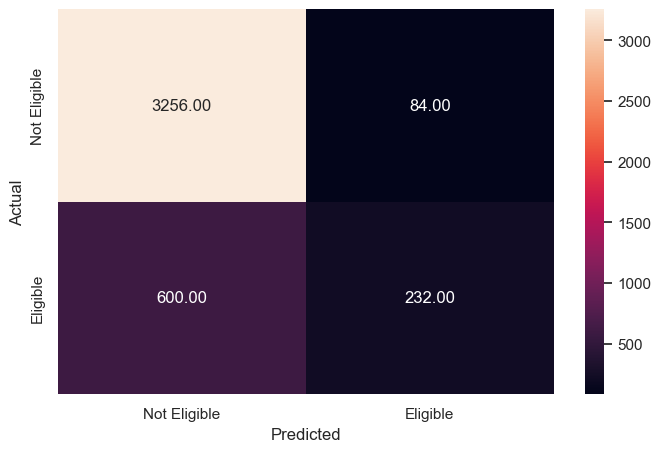

In [ ]:
#Prédiction pour l'ensemble d'entraînement
y_pred_train = lg.predict(x_train)

# Évaluation des performances sur l'ensemble d'entraînement

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1431
           1       0.75      0.28      0.41       357

    accuracy                           0.84      1788
   macro avg       0.80      0.63      0.66      1788
weighted avg       0.82      0.84      0.81      1788



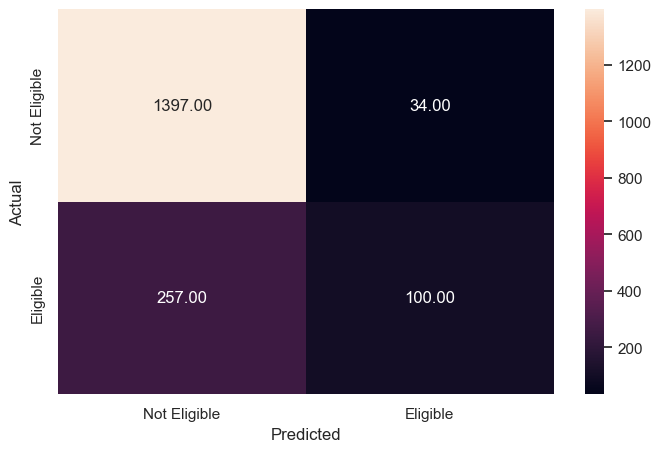

In [ ]:
y_pred_test = lg.predict(x_test)

#Test de performance avec le dataset
metrics_score(y_test, y_pred_test)

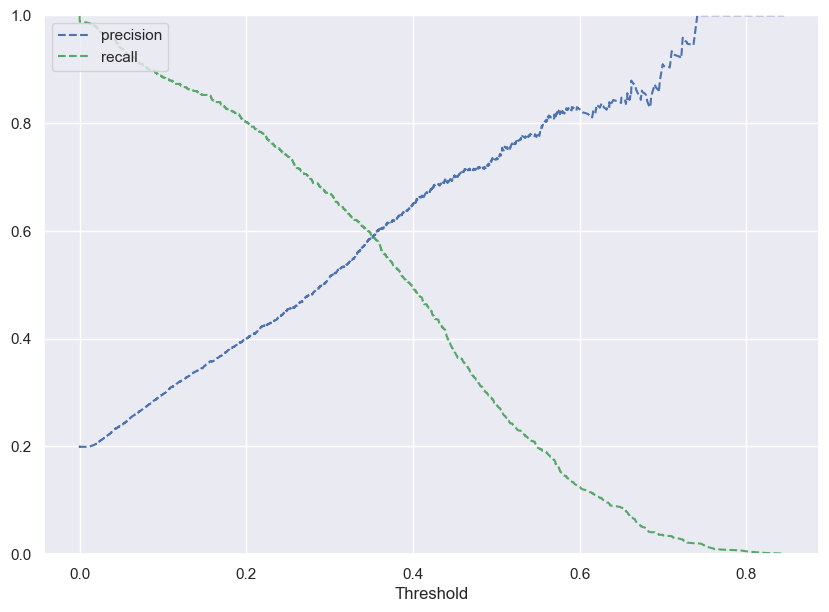

In [ ]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba donne la probabilité de chaque observation appartenant à chaque classe


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      3340
           1       0.47      0.71      0.57       832

    accuracy                           0.79      4172
   macro avg       0.70      0.76      0.71      4172
weighted avg       0.83      0.79      0.80      4172



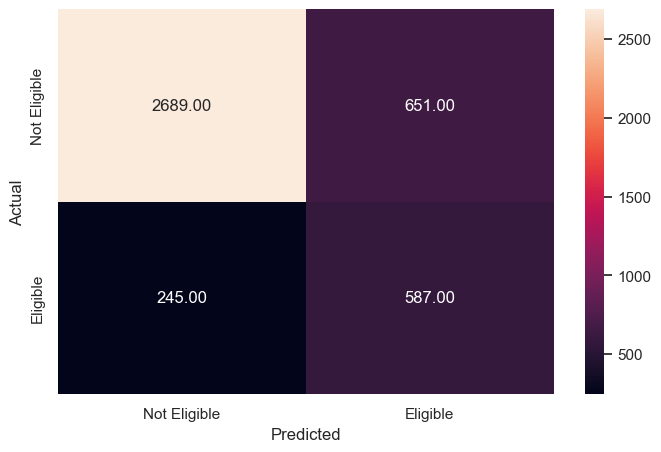

In [ ]:
    optimal_threshold1 = .27

y_pred_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1431
           1       0.49      0.71      0.58       357

    accuracy                           0.80      1788
   macro avg       0.70      0.76      0.72      1788
weighted avg       0.83      0.80      0.81      1788



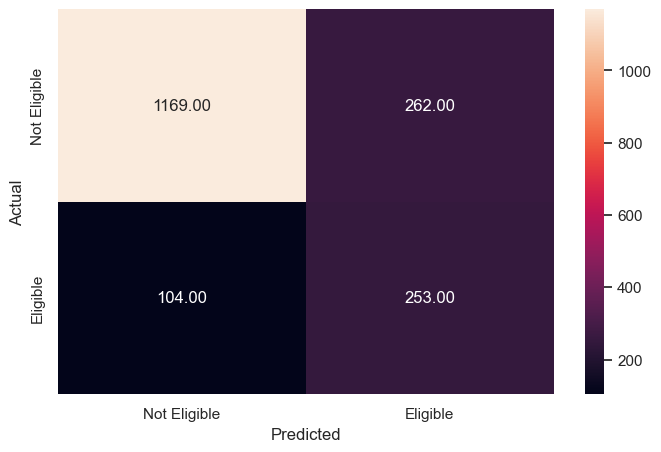

In [ ]:
optimal_threshold1 = .27

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

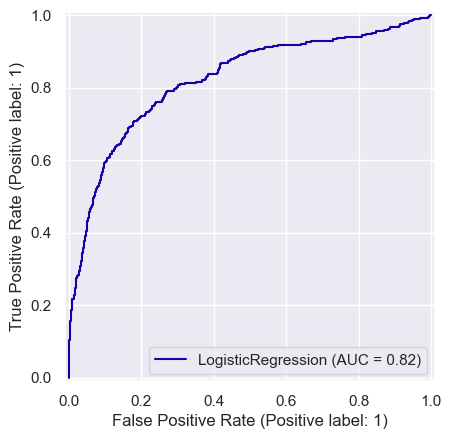

In [ ]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(lg, x_test, y_test)

In [ ]:

from sklearn.metrics import mean_squared_error


# Prédire les probabilités pour l'ensemble de test
y_probs = lg.predict_proba(x_test)[:, 1]

# Convertir les probabilités en DataFrame pour une manipulation facile
predictions_df = pd.DataFrame(data={'probabilities': y_probs, 'true_values': y_test})

# Créer des groupes basés sur les quantiles des probabilités prédites
predictions_df['quantile_group'] = pd.qcut(predictions_df['probabilities'], 10)

# Calculer l'erreur quadratique moyenne pour chaque groupe
group_stats = predictions_df.groupby('quantile_group').apply(
    lambda g: mean_squared_error(g['true_values'], g['probabilities'])
)

# Afficher l'erreur quadratique moyenne pour évaluer l'homogénéité
print("Erreur quadratique moyenne pour chaque groupe :\n", group_stats)

Erreur quadratique moyenne pour chaque groupe :
 quantile_group
(-0.0009888, 0.0277]    0.075835
(0.0277, 0.0442]        0.037816
(0.0442, 0.07]          0.037993
(0.07, 0.0999]          0.030235
(0.0999, 0.14]          0.102571
(0.14, 0.193]           0.092239
(0.193, 0.259]          0.143845
(0.259, 0.338]          0.187841
(0.338, 0.458]          0.257534
(0.458, 0.816]          0.212394
dtype: float64


Matrice de confusion :
[[1397   34]
 [ 257  100]]


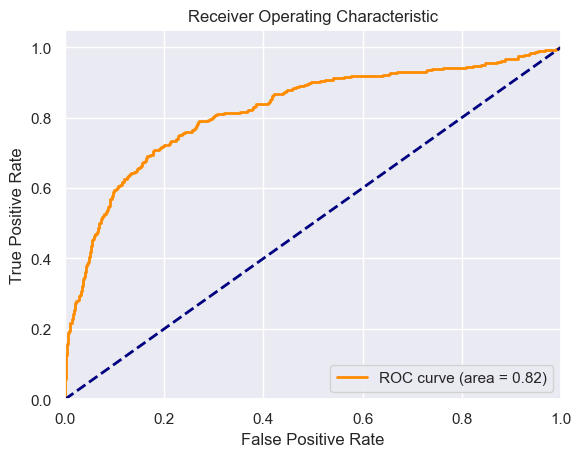

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Supposons que y_test sont les vraies étiquettes de classe et y_probs les probabilités prédites.
# y_test = ... # Vos étiquettes de sortie réelles
# y_probs = ... # Vos probabilités prédites pour la classe positive

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_probs > 0.5)  # Utiliser 0.5 comme seuil de classification
print("Matrice de confusion :")
print(conf_matrix)

# Calculer les courbes ROC et AUC pour chaque classe
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Vérification de la corrélation entre les probabilités prédites et les résultats réels
y_probs = lg.predict_proba(x_test)[:, 1]
correlation = np.corrcoef(y_probs, y_test)[0, 1]  # Calcul de la corrélation
print('Correlation between predicted probabilities and actual outcomes:', correlation)  # Affichage de la corrélation


Correlation between predicted probabilities and actual outcomes: 0.5204419799927534


In [ ]:
from sklearn.model_selection import cross_val_score

# Évaluation de la stabilité du modèle avec la validation croisée
scores = cross_val_score(lg, x_test, y_test, cv=5)  # Calcul des scores de validation croisée
print('Cross-validation scores:', scores)  # Affichage des scores


Cross-validation scores: [0.81564246 0.85195531 0.82681564 0.83753501 0.82352941]


In [ ]:
# Calcul de la concentration des erreurs
errors = (y_pred_test != y_test)  # Création d'un tableau booléen des erreurs (True si prédiction incorrecte)
concentration = errors.sum() / len(errors)  # Calcul de la concentration des erreurs
print('Concentration of errors:', concentration)  # Affichage de la concentration des erreurs


Concentration of errors: 1.0


In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


cost = rmse(y_pred, y_test)
print("RMSE:", cost)

TypeError: Object with dtype category cannot perform the numpy op subtract